### Decorators

Decorators allow us to add extra functionality to our code that can be reusable for differet´nt functions. 
Decorators *wrap* existing fucntions by taking them as arguments and adding extra functionality.

**Example 1**

In this example we will create a decorator that returns the execution time of a given function

In [1]:
import time

def calculate_time(func):

    def inner1(*args,**kwargs):

        begin = time.time()

        func(*args,**kwargs)

        end = time.time()

        print(f"Time taken to complete function {func.__name__} is {end-begin} seconds")

    return inner1


In [4]:
#calculate time for factorial function
import math

@calculate_time
def factorial(num):
    time.sleep(2)
    print(math.factorial(num))

factorial(2)


2
Time taken to complete function factorial is 2.002686023712158 seconds


What if we want to return the value of a function without specifying print in the wrapped function? We need to change our decorator slightly to allow for the value of our wrapped function to be returned

In [2]:
def calculate_time(func):

    def inner1(*args,**kwargs):

        begin = time.time()

        out = func(*args,**kwargs)

        end = time.time()

        print(f"Time taken to complete function {func.__name__} is {end-begin} seconds")

        return out

    return inner1

In [8]:
a, b = (2, 3)
@calculate_time
def sum_2_values(a,b):
    time.sleep(2)
    return a+b

sum_2_values(a,b)

Time taken to complete function sum_2_values is 2.0023651123046875 seconds


5

#### Chaining decorators

Lets chain 2 decorators together. One decorator will allow us to calculate time taken to run our code and the other will be used to print a message before and after the function executes

In [18]:
#Define the message decorater. Lets pretend we are training a model and want to indicate when we start and stop 
# model training

def print_message(func):

    def inner1(*args,**kwargs):

        print("Start model training!")

        out = func(*args,**kwargs)

        print("Finished model training!")

        return out

    return inner1



In [4]:
# Lets fit a line to some generated random data that has a linear relationship.
import numpy as np

x = np.linspace(1,10,50).reshape(-1,1)
y = x + np.random.randn(50,1)


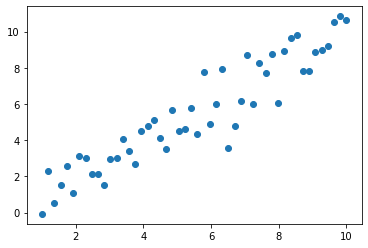

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [23]:
from sklearn.linear_model import LinearRegression

@calculate_time
@print_message
def train_linreg(x,y):
    reg=LinearRegression()
    reg.fit(x,y)
    score = reg.score(x,y)
    return f"coefficient of determination {score}"

In [24]:
train_linreg(x,y)

Start model training!
Finished model training!
Time taken to complete function inner1 is 0.004640102386474609 seconds


'coefficient of determination 0.8723706902985169'